In [2]:
import hierarchical_genomes_Mar2024 as hg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Genome Example and Network Visualization


In [3]:
# Define a simple genome
# a connection gene is of the from [from_node, to_node, weight]
# A genome consists of nested lists where the lowest level of any branch of the nested lists
# is a connection gene.

# Define a simple genome 
# with 3 nodes (given by the largest node number in the genome)
# three connections (given by the number of connection genes)
# the first two connections genes share the same weight, the third has a smaller weight. This will be shown in the graph visualization
genome = [[0,1,0.5],[1,2,0.5],[2,3,0.1]]

# Transcribe the genome into a weight matrix
weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)
print(weight_matrix)


[[0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]


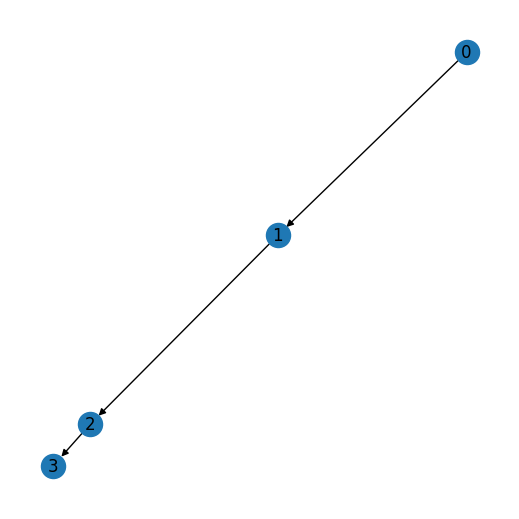

In [3]:
# Use networkx to visualize the genome
# First the weight matrix is converted into a networkx graph
graph = nx.from_numpy_array(weight_matrix, create_using=nx.DiGraph)

# Then the graph is visualized
figure = plt.figure(figsize=(5,5))

# The layout is chosen to be the kamada kawai layout, this is a force directed graph
# Its good to visualize changes in the graph produced by the genome's evolution as 
# the nodes generally stay at the same location in the graph
nx.draw_kamada_kawai(graph, with_labels=True)

# Undirected Evolution Example

Here we simple mutate the original genome over a few generations so that the we can get an intuition for how the mutation operations changes the underlying network.

In [3]:
# Setup the number of generations to evolve the genome
n_generations = 50

# Define the starting genome
genome = [[0,1,0.5],[1,2,0.5],[2,3,0.5]]

# Transcribe the first genome into a weight matrix for later visualization
weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)

# Setup lists to store the weight matrices and mutation history
weight_matrices = [weight_matrix]
mutation_history = ["initial"]

# Mutate the genome for n_generations
for generation in range(n_generations):
    genome, mutation = hg.mutate_genome_with_hox(genome)

    mutation_history.append(mutation)

    weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)
    weight_matrices.append(weight_matrix)
    


Add connection
Hox remove
Mutate Connection
Add connection
Hox remove
 Hox Shuffle
[1, 2, 0.5]
Mutate Connection
Hox copy
Mutate Connection
Mutate Connection
Remove Node
Mutated Weight
Hox copy
Add connection
Add connection
Hox copy
Mutated Weight
Hox group
 Hox Shuffle
[2, 0, 0.0808322254118726]
Mutated Weight
Hox group
Hox remove
Mutate Connection
Mutated Weight
Add connection
Add connection
 Hox Shuffle
[[14, 14, 0.5], [14, 18, 0.5], [[16, 16, 0.421083277454248], [16, 17, 0.5], [16, 18, 0.5]], [15, 16, 0.055022360477876675]]
Hox copy
Hox remove
Mutate Connection
Mutated Weight
Mutate Connection
Mutate Connection
Mutated Weight
Hox group
 Hox Shuffle
[[14, 14, 0.5], [14, 12, 0.5], [[16, 16, 0.421083277454248], [16, 17, 0.5], [16, 18, 0.5]], [15, 16, 0.055022360477876675]]
Mutate Connection
Add Node
Mutate Connection
Mutated Weight
Hox group
 Hox Shuffle
[[19, 19, 0.421083277454248], [19, 20, 0.5], [19, 21, 0.5]]
Hox group
Add connection
Add Node
Hox group
Mutate Connection
Hox remove

## Visualize the mutation history of the Genome

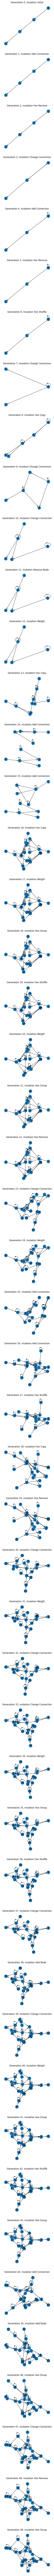

In [4]:

fig, ax = plt.subplots(n_generations,1, figsize=(5,n_generations*5))

for generation in range(n_generations):
    weight_matrix = weight_matrices[generation]
    weight_matrix = np.abs(weight_matrix)
    
    if len(weight_matrix.shape) == 2:
        # Add 1 to all non-zero weights to make the visualization nicer
        weight_matrix += weight_matrix != 0

        graph = nx.from_numpy_array(weight_matrix, create_using=nx.DiGraph)
        nx.draw_kamada_kawai(graph, ax=ax[generation], with_labels=True)
        ax[generation].set_title(f"Generation {generation}, mutation {mutation_history[generation]}")
plt.show()